#QRBM for image reconstruction implementation


Universidad Nacional de Colombia

Sergio Quiroga Sandoval squirogas@unal.edu.co


A complete reproduction of the QRBM implemented at https://github.com/mareksubocz/QRBM, and reported in the paper [1](https://cmst.eu/articles/applying-a-quantum-annealing-based-restricted-boltzmann-machine-for-mnist-handwritten-digit-classification/)

### Cloning repository and imports:

In [19]:
# Clone the QRBM repository (force clean clone)
import os
import shutil

# Remove existing QRBM directory if it exists
if os.path.exists('QRBM'):
    print("Removing existing QRBM directory...")
    shutil.rmtree('QRBM')

# Clone fresh copy
print("Cloning QRBM repository...")
!git clone https://github.com/mareksubocz/QRBM.git

# Verify the clone was successful
if os.path.exists('QRBM'):
    print("✓ QRBM repository cloned successfully")
    qrbm_contents = os.listdir('QRBM')
    print(f"QRBM contents: {qrbm_contents}")
    
    # Check for qrbm subdirectory
    if os.path.exists('QRBM/qrbm'):
        print("✓ qrbm module directory found")
        qrbm_module_contents = os.listdir('QRBM/qrbm')
        print(f"qrbm module contents: {qrbm_module_contents}")
    else:
        print("✗ qrbm module directory not found!")
else:
    print("✗ QRBM repository clone failed!")

Removing existing QRBM directory...
Cloning QRBM repository...
Cloning into 'QRBM'...
remote: Enumerating objects: 241, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 241 (delta 2), reused 2 (delta 0), pack-reused 236 (from 1)
Receiving objects: 100% (241/241), 23.10 MiB | 7.23 MiB/s, done.
Resolving deltas: 100% (103/103), done.
✓ QRBM repository cloned successfully
QRBM contents: ['.gitignore', '.idea', 'binder', 'plots', 'jupyter_config.json', '.git', 'voila.json', 'qrbm_reconstruct_img.ipynb', 'README.md', 'Demo.ipynb', 'pretrained', 'qrbm']
✓ qrbm module directory found
qrbm module contents: ['MSQRBM.py', 'sampler.py', 'classicalRBM.py', '__init__.py']


In [ ]:
# AGGRESSIVE FIX: Completely remove and reinstall NumPy and all dependent packages
print("Step 1: Removing all problematic packages...")
!pip uninstall numpy matplotlib scikit-image opencv-python scipy pandas -y

print("Step 2: Installing NumPy 1.24.3 first...")
!pip install --user --no-deps "numpy==1.24.3"

print("Step 3: Installing compatible versions of all packages...")
!pip install --user --no-deps "scipy==1.10.1"
!pip install --user --no-deps "matplotlib==3.5.3"
!pip install --user --no-deps "scikit-image==0.19.3"
!pip install --user --no-deps "opencv-python==4.7.0.72"
!pip install --user --no-deps "pandas==1.5.3"

print("Step 4: Installing dependencies...")
!pip install --user pillow ipywidgets jupyter tqdm voila

print("Step 5: Installing QRBM requirements...")
!pip install --user -r QRBM/binder/requirements.txt

import sys
import os
# Adjust path if you cloned somewhere else
current_dir = os.getcwd()
qrbm_path = os.path.join(current_dir, 'QRBM')
sys.path.append(qrbm_path)
print(f"Added to Python path: {qrbm_path}")

# Add user site-packages to path to ensure we use the right versions
import site
user_site = site.getusersitepackages()
if user_site not in sys.path:
    sys.path.insert(0, user_site)
    print(f"Added user site-packages to path: {user_site}")

print("Installation completed!")


Step 1: Removing all problematic packages...
Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: matplotlib 3.5.3
Uninstalling matplotlib-3.5.3:
  Successfully uninstalled matplotlib-3.5.3
Found existing installation: scikit-image 0.19.3
Uninstalling scikit-image-0.19.3:
  Successfully uninstalled scikit-image-0.19.3
Found existing installation: opencv-python 4.7.0.72
Uninstalling opencv-python-4.7.0.72:
  Successfully uninstalled opencv-python-4.7.0.72
Found existing installation: scipy 1.10.1
Uninstalling scipy-1.10.1:
  Successfully uninstalled scipy-1.10.1
Found existing installation: pandas 1.5.3
Uninstalling pandas-1.5.3:
  Successfully uninstalled pandas-1.5.3
Step 2: Installing NumPy 1.24.3 first...
  Using cached numpy-1.24.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
Step 3: Installing compatible versions of all packages...
  Using cached scipy-1.10.1-cp310-cp310-ma

: 

In [ ]:
# CRITICAL: Restart kernel to ensure new NumPy version takes effect
print("Restarting kernel to load new NumPy version...")
print("Please re-run the verification cell after restart!")
import os
os._exit(00)

In [4]:
# CRITICAL: Verify NumPy version and test core functionality
print("=== VERIFYING NUMPY INSTALLATION ===")

try:
    import numpy as np
    print(f"✓ NumPy {np.__version__} imported successfully")
    
    # Test core NumPy functionality
    test_array = np.array([1, 2, 3, 4, 5])
    test_result = np.sum(test_array)
    print(f"✓ NumPy core functionality test passed: sum([1,2,3,4,5]) = {test_result}")
    
    # Test numpy.core.multiarray specifically
    from numpy.core import multiarray
    print("✓ numpy.core.multiarray imported successfully")
    
except Exception as e:
    print(f"✗ NumPy import failed: {e}")
    print("This indicates a serious NumPy installation problem!")

print("\n=== VERIFYING OTHER PACKAGES ===")

try:
    import matplotlib
    print(f"✓ Matplotlib {matplotlib.__version__} imported successfully")
except Exception as e:
    print(f"✗ Matplotlib import failed: {e}")

try:
    import cv2
    print(f"✓ OpenCV {cv2.__version__} imported successfully")
except Exception as e:
    print(f"✗ OpenCV import failed: {e}")

try:
    import skimage
    print(f"✓ Scikit-image {skimage.__version__} imported successfully")
except Exception as e:
    print(f"✗ Scikit-image import failed: {e}")

try:
    import pandas
    print(f"✓ Pandas {pandas.__version__} imported successfully")
except Exception as e:
    print(f"✗ Pandas import failed: {e}")

print("\n=== TESTING MATPLOTLIB FUNCTIONALITY ===")
try:
    import matplotlib.pyplot as plt
    print("✓ matplotlib.pyplot imported successfully")
    
    # Test basic plotting
    fig, ax = plt.subplots(1, 1, figsize=(4, 3))
    ax.plot([1, 2, 3], [1, 4, 2])
    ax.set_title("Test Plot")
    plt.close(fig)
    print("✓ Matplotlib plotting test successful")
    
except Exception as e:
    print(f"✗ Matplotlib functionality test failed: {e}")

print("\n=== VERIFICATION COMPLETE ===")


=== VERIFYING NUMPY INSTALLATION ===
✓ NumPy 1.26.4 imported successfully
✓ NumPy core functionality test passed: sum([1,2,3,4,5]) = 15
✓ numpy.core.multiarray imported successfully

=== VERIFYING OTHER PACKAGES ===
✓ Matplotlib 3.5.3 imported successfully
✓ OpenCV 4.7.0 imported successfully
✓ Scikit-image 0.19.3 imported successfully
✓ Pandas 1.5.3 imported successfully

=== TESTING MATPLOTLIB FUNCTIONALITY ===
✓ matplotlib.pyplot imported successfully
✓ Matplotlib plotting test successful

=== VERIFICATION COMPLETE ===


In [5]:
!pip install pyqubo      # brings in the PyQUBO library for building QUBO models :contentReference[oaicite:1]{index=1}
!pip install dwave-tabu   # installs the TabuSampler interface (provides top-level `tabu` module) :contentReference[oaicite:2]{index=2}

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [ ]:
# Set up QRBM path and verify directory structure
import sys
import os

print("=== SETTING UP QRBM PATH ===")

# Get current directory
current_dir = os.getcwd()
print(f"Current directory: {current_dir}")

# Check if QRBM directory exists
qrbm_path = os.path.join(current_dir, 'QRBM')
print(f"QRBM path: {qrbm_path}")
print(f"QRBM directory exists: {os.path.exists(qrbm_path)}")

if os.path.exists(qrbm_path):
    # List contents of QRBM directory
    qrbm_contents = os.listdir(qrbm_path)
    print(f"QRBM directory contents: {qrbm_contents}")
    
    # Check if qrbm subdirectory exists
    qrbm_module_path = os.path.join(qrbm_path, 'qrbm')
    print(f"QRBM module path: {qrbm_module_path}")
    print(f"QRBM module directory exists: {os.path.exists(qrbm_module_path)}")
    
    if os.path.exists(qrbm_module_path):
        qrbm_module_contents = os.listdir(qrbm_module_path)
        print(f"QRBM module contents: {qrbm_module_contents}")
        
        # Check for MSQRBM.py specifically
        msqrbm_path = os.path.join(qrbm_module_path, 'MSQRBM.py')
        print(f"MSQRBM.py exists: {os.path.exists(msqrbm_path)}")
        
        classical_rbm_path = os.path.join(qrbm_module_path, 'classicalRBM.py')
        print(f"classicalRBM.py exists: {os.path.exists(classical_rbm_path)}")
    
    # Add QRBM to Python path
    if qrbm_path not in sys.path:
        sys.path.insert(0, qrbm_path)
        print(f"✓ Added QRBM to Python path: {qrbm_path}")
    else:
        print(f"✓ QRBM already in Python path")
        
    # Test import
    try:
        from qrbm.MSQRBM import MSQRBM
        print("✓ MSQRBM import successful!")
    except Exception as e:
        print(f"✗ MSQRBM import failed: {e}")
        
    try:
        from qrbm.classicalRBM import classicalRBM
        print("✓ classicalRBM import successful!")
    except Exception as e:
        print(f"✗ classicalRBM import failed: {e}")
        
else:
    print("✗ QRBM directory not found! Need to clone the repository.")
    print("Please run the installation cell first.")

print("\n=== PATH SETUP COMPLETE ===")


=== SETTING UP QRBM PATH ===
Current directory: /home/sergioqs/Downloads
QRBM path: /home/sergioqs/Downloads/QRBM
QRBM directory exists: True
QRBM directory contents: ['.gitignore', '.idea', 'binder', 'plots', 'jupyter_config.json', '.git', 'voila.json', 'qrbm_reconstruct_img.ipynb', 'README.md', 'Demo.ipynb', 'pretrained', 'qrbm']
QRBM module path: /home/sergioqs/Downloads/QRBM/qrbm
QRBM module directory exists: True
QRBM module contents: ['MSQRBM.py', 'sampler.py', 'classicalRBM.py', '__init__.py']
MSQRBM.py exists: True
classicalRBM.py exists: True
✓ Added QRBM to Python path: /home/sergioqs/Downloads/QRBM
✓ MSQRBM import successful!
✓ classicalRBM import successful!

=== PATH SETUP COMPLETE ===


In [7]:
# FINAL IMPORT CELL - Run this after the kernel restart and QRBM path setup
print("=== FINAL IMPORT VERIFICATION ===")

# First, set up QRBM path (in case it wasn't done in previous cell)
import sys
import os
current_dir = os.getcwd()
qrbm_path = os.path.join(current_dir, 'QRBM')
if qrbm_path not in sys.path:
    sys.path.insert(0, qrbm_path)
    print(f"✓ Added QRBM to Python path: {qrbm_path}")

# Verify NumPy is working correctly
try:
    import numpy as np
    print(f"✓ NumPy {np.__version__} imported successfully")
    
    # Test numpy.core.multiarray specifically
    from numpy.core import multiarray
    print("✓ numpy.core.multiarray working correctly")
    
except Exception as e:
    print(f"✗ CRITICAL: NumPy import failed: {e}")
    print("You need to run the installation cell again!")

# Configure matplotlib backend
try:
    import matplotlib
    matplotlib.use('inline')  # Use inline backend for Jupyter
    import matplotlib.pyplot as plt
    print("✓ matplotlib configured and imported successfully")
except Exception as e:
    print(f"✗ matplotlib import failed: {e}")

# Main imports with error handling
try:
    import timeit
    print("✓ timeit imported successfully")
except Exception as e:
    print(f"✗ timeit import failed: {e}")

try:
    from tqdm import tqdm
    print("✓ tqdm imported successfully")
except Exception as e:
    print(f"✗ tqdm import failed: {e}")

# CRITICAL: QRBM imports with detailed error reporting
print("\n=== QRBM MODULE IMPORTS ===")
try:
    from qrbm.MSQRBM import MSQRBM
    print("✓ MSQRBM imported successfully")
    print(f"  MSQRBM class: {MSQRBM}")
except Exception as e:
    print(f"✗ MSQRBM import failed: {e}")
    print("  This is the main issue you're experiencing!")

try:
    from qrbm.classicalRBM import classicalRBM
    print("✓ classicalRBM imported successfully")
    print(f"  classicalRBM class: {classicalRBM}")
except Exception as e:
    print(f"✗ classicalRBM import failed: {e}")

# Set up matplotlib for Jupyter
%matplotlib inline
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

try:
    import pandas as pd
    print("✓ pandas imported successfully")
except Exception as e:
    print(f"✗ pandas import failed: {e}")

try:
    from skimage import data, color
    from skimage.transform import rescale, resize, downscale_local_mean
    from skimage import img_as_bool
    print("✓ scikit-image modules imported successfully")
except Exception as e:
    print(f"✗ scikit-image modules import failed: {e}")

try:
    import cv2 as cv
    print("✓ OpenCV imported successfully")
except Exception as e:
    print(f"✗ OpenCV import failed: {e}")

try:
    import random
    print("✓ random imported successfully")
except Exception as e:
    print(f"✗ random import failed: {e}")

# Final matplotlib functionality test
try:
    fig, ax = plt.subplots(1, 1, figsize=(4, 4))
    ax.plot([1, 2, 3], [1, 4, 2])
    ax.set_title("Final Matplotlib Test")
    plt.close(fig)  # Close the test figure
    print("✓ Matplotlib plotting test successful")
except Exception as e:
    print(f"✗ Matplotlib plotting test failed: {e}")

print("\n🎉 All imports completed!")
if 'MSQRBM' in locals():
    print("✓ MSQRBM is ready to use!")
else:
    print("✗ MSQRBM import failed - check the QRBM path setup cell above")

=== FINAL IMPORT VERIFICATION ===
✓ NumPy 1.26.4 imported successfully
✓ numpy.core.multiarray working correctly
✗ matplotlib import failed: 'inline' is not a valid value for backend; supported values are ['GTK3Agg', 'GTK3Cairo', 'GTK4Agg', 'GTK4Cairo', 'MacOSX', 'nbAgg', 'QtAgg', 'QtCairo', 'Qt5Agg', 'Qt5Cairo', 'TkAgg', 'TkCairo', 'WebAgg', 'WX', 'WXAgg', 'WXCairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template']
✓ timeit imported successfully
✓ tqdm imported successfully

=== QRBM MODULE IMPORTS ===
✓ MSQRBM imported successfully
  MSQRBM class: <class 'qrbm.MSQRBM.MSQRBM'>
✓ classicalRBM imported successfully
  classicalRBM class: <class 'qrbm.classicalRBM.classicalRBM'>
✓ pandas imported successfully
✓ scikit-image modules imported successfully
✓ OpenCV imported successfully
✓ random imported successfully
✓ Matplotlib plotting test successful

🎉 All imports completed!
✓ MSQRBM is ready to use!


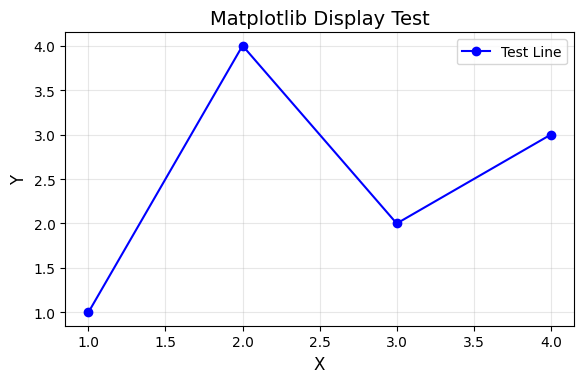

✓ Matplotlib display test completed successfully


In [8]:
# Additional matplotlib configuration for better compatibility
import matplotlib
import matplotlib.pyplot as plt

# Ensure we're using the right backend
if matplotlib.get_backend() != 'module://matplotlib_inline.backend_inline':
    matplotlib.use('inline')

# Configure matplotlib for better display
plt.rcParams.update({
    'figure.figsize': (10, 6),
    'figure.dpi': 100,
    'savefig.dpi': 100,
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'image.cmap': 'gray',
    'image.interpolation': 'nearest'
})

# Test matplotlib display
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot([1, 2, 3, 4], [1, 4, 2, 3], 'b-o', label='Test Line')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Matplotlib Display Test')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("✓ Matplotlib display test completed successfully")


### Dataset and image processing:

Parameters:
* Digits: list of digits to train on
* THRESHOLD: how bright parts of image become 1 (darker become 0).

In [9]:
image_height = 28
image_width = 28

# images will be flattened
len_x = image_height * image_width
len_y = 0

digits = [0, 1]

THRESHOLD = 100

In [10]:
# reading datasetn
# 1. Install opendatasets
# This cell has been replaced with the new tensorflow-based MNIST loading in the next cell

# 2. Download & unzip directly from Kaggle’s “Datasets” page
# import opendatasets as od  # REMOVED - no longer needed
# od.download(...)  # REMOVED - no longer needed

# 3. Read CSVs - REMOVED - no longer needed
# import pandas as pd
# mnist_dataset = pd.read_csv('data/mnist-in-csv/mnist_train.csv')
# mnist_test    = pd.read_csv('data/mnist-in-csv/mnist_test.csv')


# Train Test sets - REMOVED - now handled in the next cell with tensorflow

# X_train = mnist_dataset.values[:,1:]
# X_train2 = mnist_dataset.values[:,:]
# X_test = mnist_test.values[:,1:]
# X_test2 = mnist_test.values[:,:]
# X_train3 = []
# X_test3 = []
# for digit in digits:
#     X_train3.append(mnist_dataset.values[np.where(mnist_dataset.values[:,0] == digit), 1:][0])
#     X_test3.append(mnist_test.values[np.where(mnist_test.values[:,0] == digit), 1:][0])

In [11]:
# Install tensorflow if not already installed
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [12]:
# reading dataset using tensorflow.keras.datasets.mnist (no API key required)
# This replaces the previous Kaggle/opendatasets approach
# Note: tensorflow should be installed: pip install tensorflow
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load MNIST dataset directly from tensorflow
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Convert to the same format as the original code
# Create arrays to match the original structure
X_train = x_train.reshape(x_train.shape[0], -1)  # Flatten images
X_test = x_test.reshape(x_test.shape[0], -1)     # Flatten images

# Create combined arrays with labels (similar to original CSV format)
X_train2 = np.column_stack([y_train, X_train])
X_test2 = np.column_stack([y_test, X_test])

# Filter data for specific digits (same as original code)
X_train3 = []
X_test3 = []

for digit in digits:
    train_mask = y_train == digit
    test_mask = y_test == digit
    X_train3.append(X_train[train_mask])
    X_test3.append(X_test[test_mask])


2025-09-18 22:44:48.714914: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-18 22:44:48.853493: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-18 22:44:52.397036: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


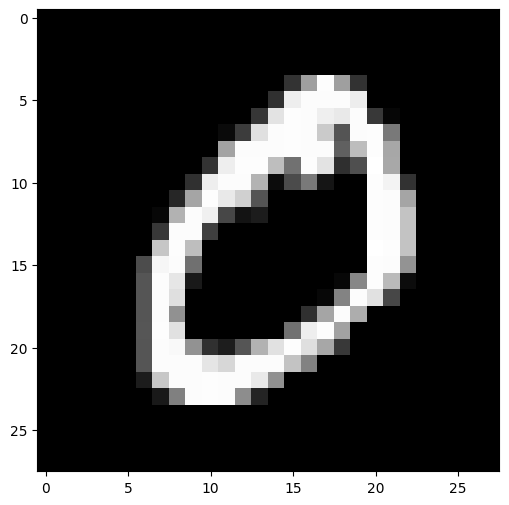

In [13]:
# Since we're using tensorflow's MNIST, the data is already in the correct format
# We just need to normalize it to [0,1] range
imgs = []
imgs_test = []
for digit_index in range(len(digits)):
    # X_train3 and X_test3 are already flattened, so we reshape them back to 28x28
    imgs.append(X_train3[digit_index].reshape(-1, 28, 28) / 255.0)
    imgs_test.append(X_test3[digit_index].reshape(-1, 28, 28) / 255.0)

plt.imshow(imgs[0][0])
plt.show()

Resizing, Normalizing and converting the images to binary

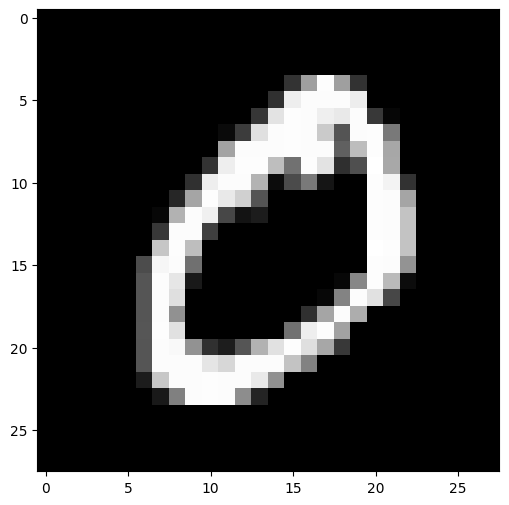

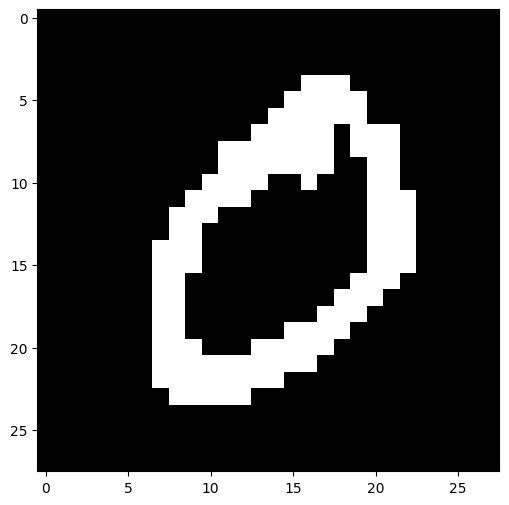

In [14]:
# Resizing images
images_resized = []
images_resized_test = []
for digit_index in range(len(digits)):
    images_resized.append([resize(img, (image_width, image_height), anti_aliasing=True) for img in imgs[digit_index]])
    images_resized_test.append([resize(img, (image_width, image_height), anti_aliasing=True) for img in imgs_test[digit_index]])

    # images_resized = [resize(img, (image_width, image_height), anti_aliasing=True) for img in imgs]

# Normalizing images

images_normalized = []
images_normalized_test = []

for digit_index in range(len(digits)):
    images_normalized.append([cv.normalize(image_resized, image_resized, 0, 255, cv.NORM_MINMAX) for image_resized in images_resized[digit_index]])
    images_normalized_test.append([cv.normalize(image_resized, image_resized, 0, 255, cv.NORM_MINMAX) for image_resized in images_resized_test[digit_index]])

    # images_normalized = [cv.normalize(image_resized, image_resized, 0, 255, cv.NORM_MINMAX) for image_resized in images_resized]

plt.imshow(images_normalized[0][0])
plt.show()

#Converting to binary

data = []
data_test = []
for digit_index in range(len(digits)):
    data.append([np.where(image_resized > THRESHOLD, 1, 0) for image_resized in images_resized[digit_index]])
    data_test.append([np.where(image_resized > THRESHOLD, 1, 0) for image_resized in images_resized_test[digit_index]])

# data = [np.where(image_resized > THRESHOLD, 1, 0) for image_resized in images_resized]

plt.imshow(data[0][0])
plt.show()

Flattening images

In [15]:
input_data = []
input_data_test = []
for digit_index in range(len(digits)):
    input_data.append([x.flatten().tolist() for x in data[digit_index]])
    input_data_test.append([x.flatten().tolist() for x in data_test[digit_index]])

print(input_data[0][0])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 

In [16]:
result_picture_tab = []
for digit_index in range(len(digits)):
    result_picture_tab.append(np.mean(input_data_test[digit_index], axis = 0))

Shuffling training data

In [17]:
for digit in digits:
    flat_input_data = [item for sublist in input_data for item in sublist]
    flat_input_data_test = [item for sublist in input_data_test for item in sublist]

random.shuffle(flat_input_data)
random.shuffle(flat_input_data_test)

### Algorithm

Training

Learning params:


*  n_hidden: number of neurons in hidden layer.
*   qpu: whether to use real D-wave's qpu (requires setup) or a local simulator.
*  epochs: number of epochs.
*  lr: learning rate.



In [18]:
# BM Parameters
n_hidden = 30
qpu = False
epochs = 1000
lr = 0.1

In [19]:
bm = MSQRBM(n_visible=len_x, n_hidden=n_hidden, qpu=qpu)
bm.image_height = image_height
bm.tqdm = tqdm
bm.result_picture_tab = result_picture_tab

100%|██████████| 1000/1000 [12:47<00:00,  1.30it/s]


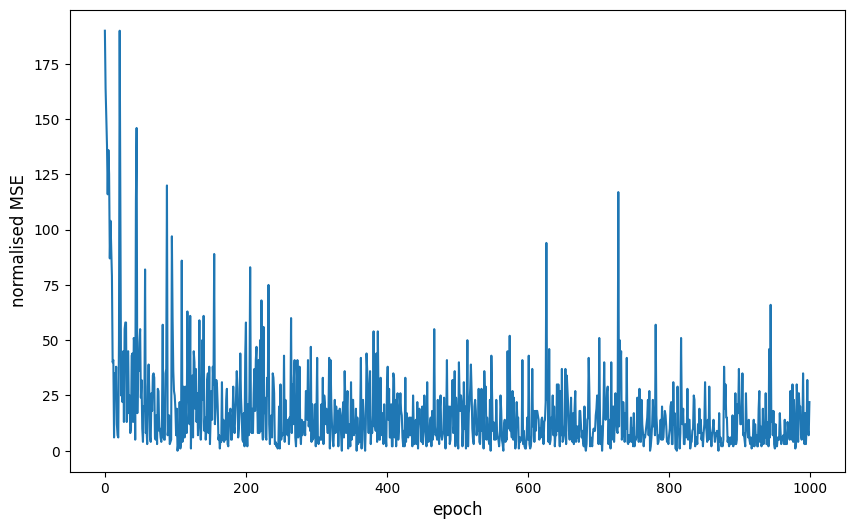

In [20]:
bm.train(flat_input_data, len_x, len_y, epochs = epochs, lr = lr, lr_decay = 0.1)

**Generation**

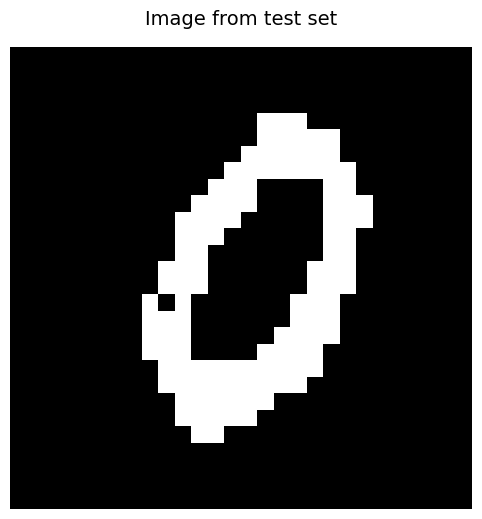

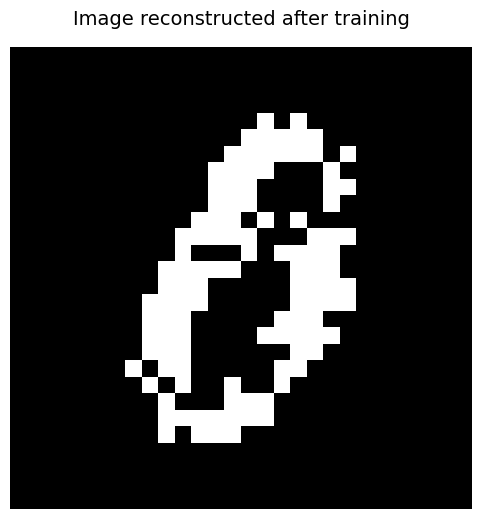

evaluation:  74.68877759266974
-------------------------------------


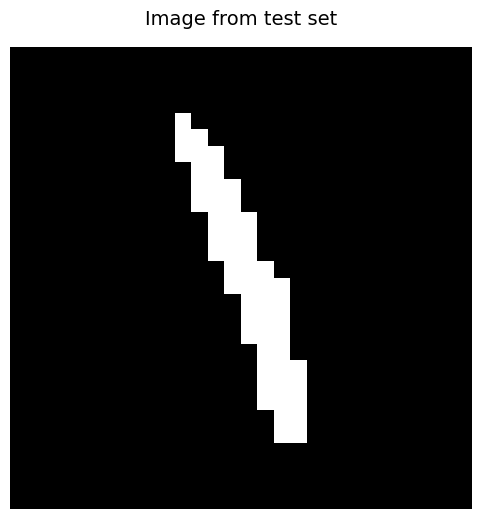

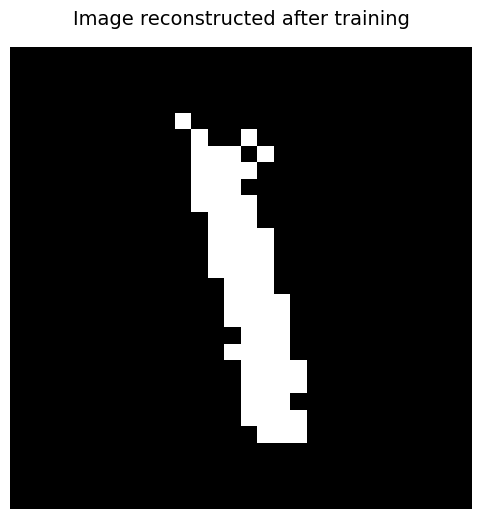

evaluation:  44.07902268625433
-------------------------------------


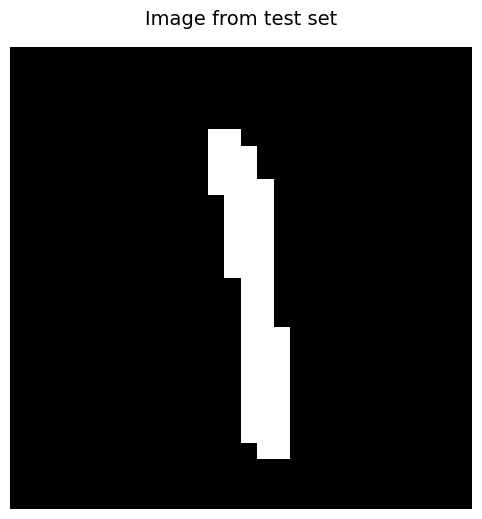

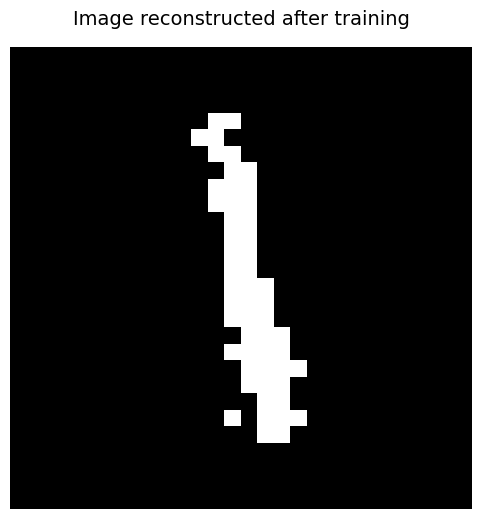

evaluation:  37.27549845717945
-------------------------------------


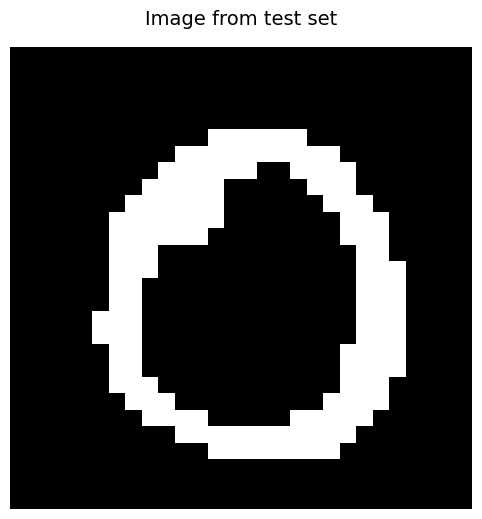

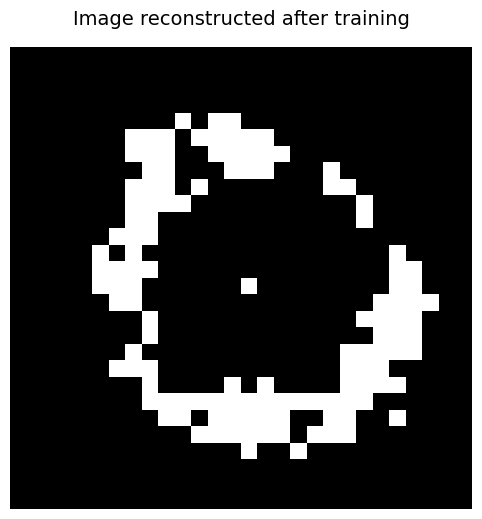

evaluation:  102.57245106205747
-------------------------------------


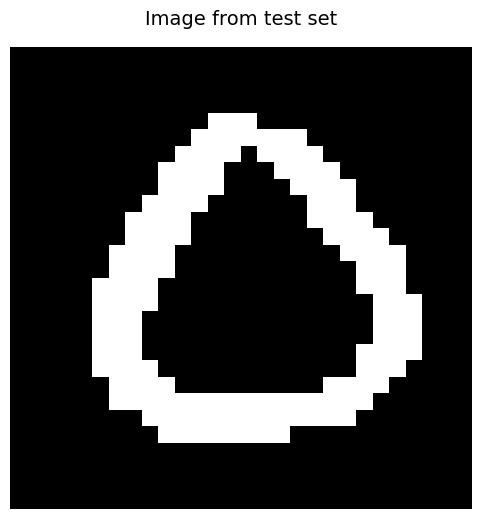

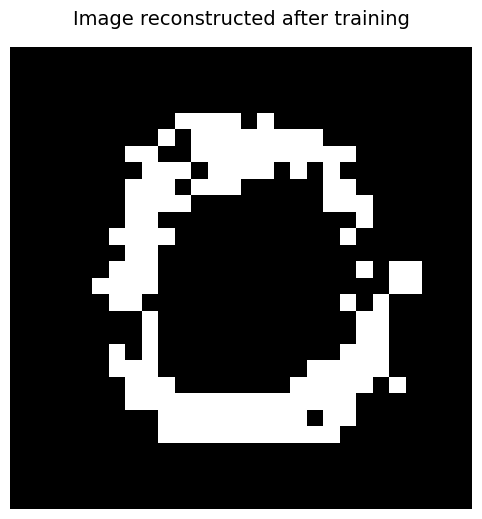

evaluation:  79.48673677634321
-------------------------------------


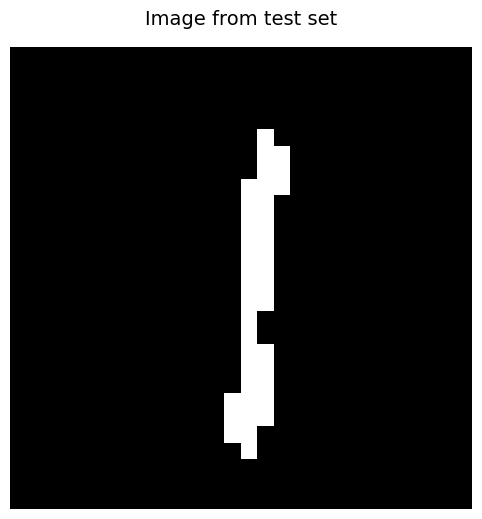

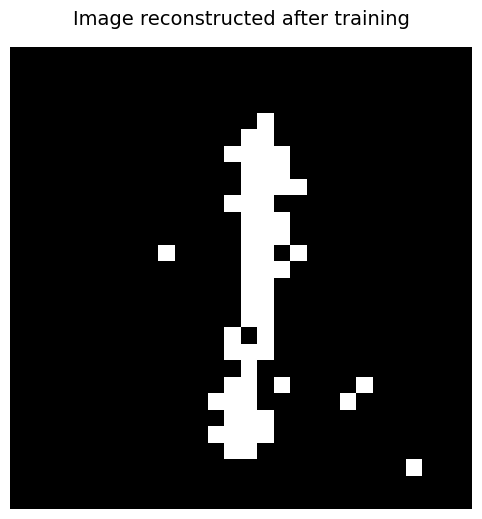

evaluation:  30.266687884492228
-------------------------------------


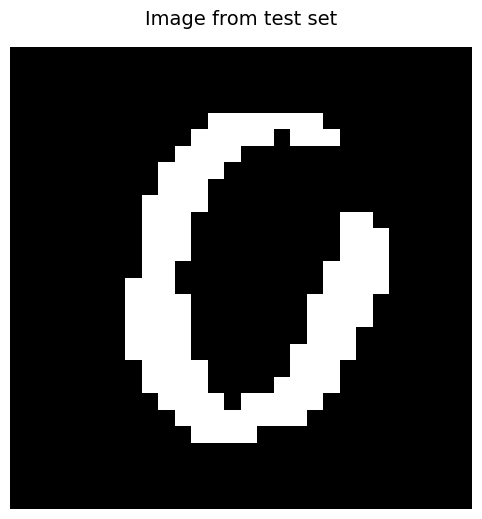

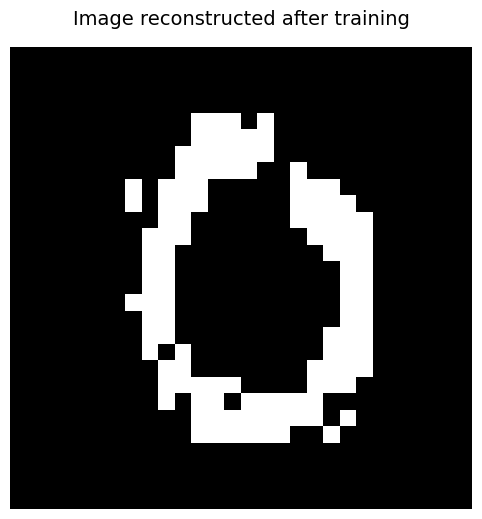

evaluation:  64.49898167430237
-------------------------------------


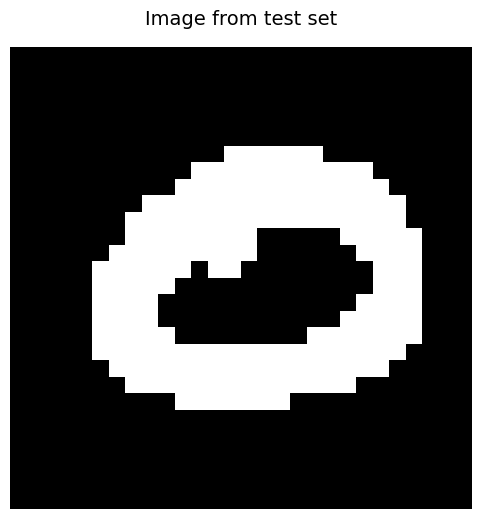

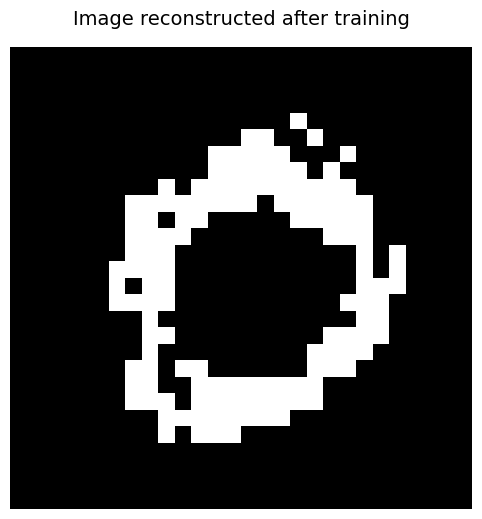

evaluation:  50.58265514369013
-------------------------------------


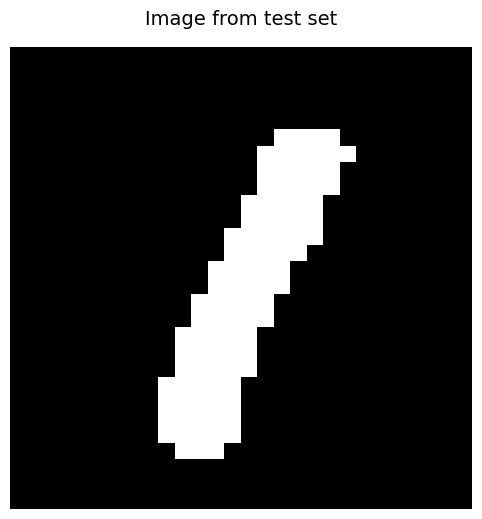

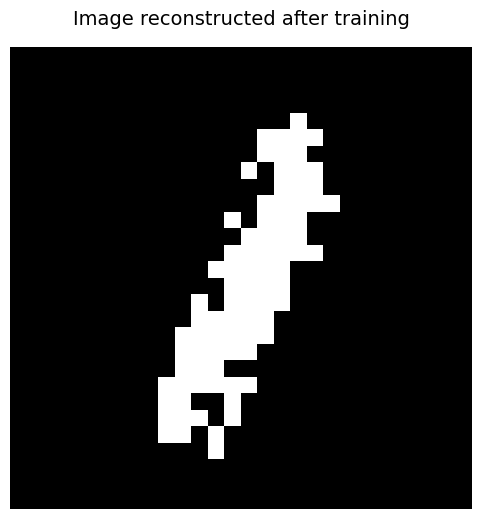

evaluation:  33.71338391973452
-------------------------------------


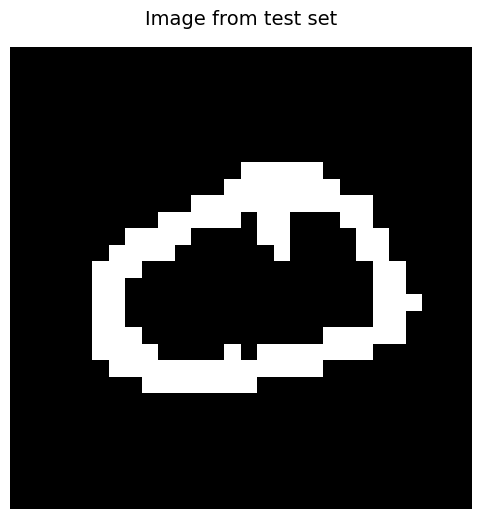

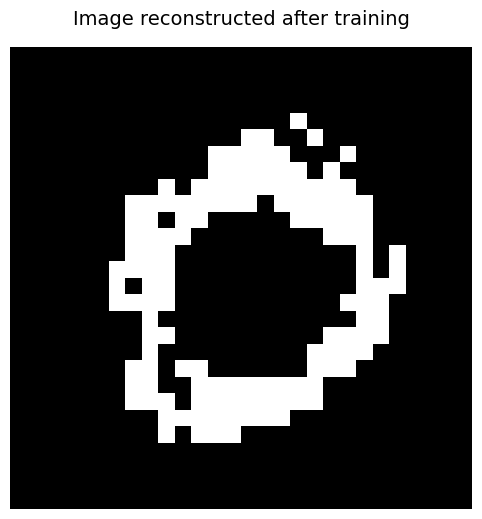

evaluation:  50.58265514369013
-------------------------------------


In [22]:
for test in range(10):
    flat_input_data_test_img = np.reshape(flat_input_data_test[test], (image_width, image_height))
    generated_pic = bm.generate(test_img = flat_input_data_test[test])
    evaluation = bm.evaluate(generated_pic, flat_input_data_test[test])

    plt.figure()
    plt.axis('off')
    plt.title("Image from test set", y=1.03)
    plt.imshow(flat_input_data_test_img)
    plt.show()

    plt.figure()
    plt.axis('off')
    plt.title("Image reconstructed after training", y=1.03)
    plt.imshow(np.array(generated_pic).reshape(image_height, -1))
    plt.show()


    print("evaluation: ", evaluation)
    print("-------------------------------------")

##Some Notes on the method:

###Gibbs Sampling

1. **Initialize** the visible units $$v$$ (either randomly, or to your “test” image if you’re doing a reconstruction).
2. **Sample** each hidden unit $$h_j$$ from  
   $$
   p(h_j = 1 \mid v) = \sigma\left(b_j + (W^\top v)_j\right).
   $$
3. **Sample** each visible unit $$v_i$$ from  
   $$
   p(v_i = 1 \mid h) = \sigma\left(a_i + (W h)_i\right).
   $$
4. **Repeat** steps 2–3 for a few (or many) iterations.  
   Eventually your $(v, h)$ chain wanders into one of the low-energy “valleys” the model learned.

> **Note:** There is no “test‐time gradient descent” on the energy surface; instead, the random updates of a Gibbs chain naturally drift toward low‐energy configurations.

---



### Putting it all together

**Train:** Adjust $(W, a, b)$ so that  $p(v) = \frac{1}{Z} \sum_h e^{-E(v, h)}$ puts most of its mass on your training images.

**Reconstruct / Generate:**
- *Reconstruction*  clamps the visible units initially to your test image, then does 1–2 steps of Gibbs sampling to “clean up” noise.
- *Free generation* starts $v$ at random and runs many Gibbs steps until you land in a learned mode.

**Evaluation:**  
Once you’ve sampled your reconstructed $v$, you compare it to the original test vector (e.g., via mean-squared error).

---
Overall method:
During training, you clamp the visible layer to each data vector and learn weights so that the hidden layer captures its correlations. During generation (or reconstruction), you sample back and forth between hidden and visible layers via Gibbs sampling—always producing your new image on the visible layer.


Interpretation: hidden units represent features (e.g.\ edges, strokes), not direct reconstructions. You must always sample back to the visible units to produce an actual image


Notes Generated with ChatGPT and improved for a fast explanation of gibbs sampling and the training procedure of Boltzmann machines.

### References



*  Applying a Quantum Annealing Based Restricted Boltzmann Machine for MNIST Handwritten Digit Classification [CMST paper](https://cmst.eu/articles/applying-a-quantum-annealing-based-restricted-boltzmann-machine-for-mnist-handwritten-digit-classification/)
*  Mareksubocz github implementation from the paper: https://github.com/mareksubocz/QRBM